# EDA with Forest Fires

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Rager/Downloads/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
df1 = df.drop(['month','day'],axis = 1).corr()

<Axes: >

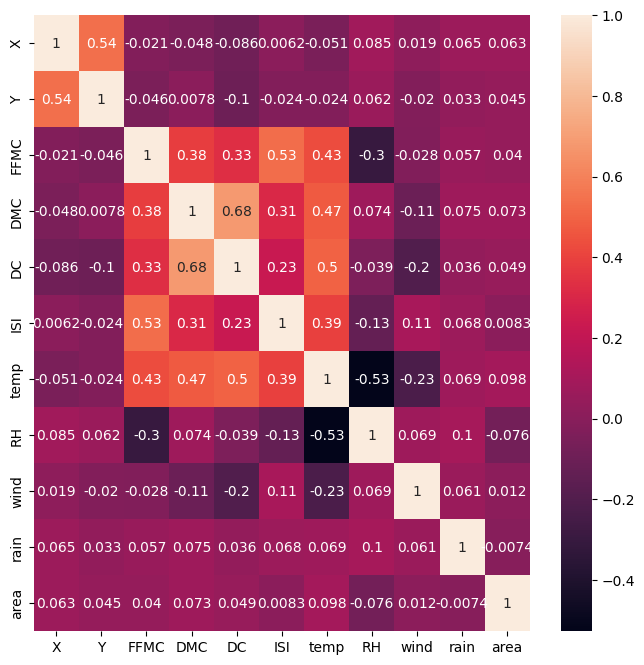

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(df1,annot = True)

In [15]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [17]:
df = df.drop(['month','day'],axis = 1)

In [19]:
df.dtypes

X         int64
Y         int64
FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
RH        int64
wind    float64
rain    float64
area    float64
dtype: object

In [41]:
x = df.iloc[:,0:9]
y = df[['rain']]

In [42]:
x.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8


In [43]:
y.head()

,rain
0,0.0
1,0.0
2,0.0
3,0.2
4,0.0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [47]:
regressor.coef_,regressor.intercept_

(array([[ 0.01674878, -0.00130781,  0.01563287, -0.01044668, -0.01728674,
          0.0072144 ,  0.06952998,  0.06831229,  0.01841467]]),
 array([0.02179177]))

In [48]:
y_test_pred = regressor.predict(x_test_scaled)
y_test_pred

array([[ 0.17241286],
       [ 0.16988669],
       [ 0.01650173],
       [ 0.07613319],
       [ 0.09323978],
       [-0.04548974],
       [ 0.09656768],
       [ 0.02493003],
       [-0.03113845],
       [ 0.12320339],
       [ 0.04358875],
       [ 0.04105255],
       [ 0.03128961],
       [ 0.00146666],
       [ 0.08034835],
       [-0.02263554],
       [ 0.03003118],
       [ 0.03998292],
       [ 0.04747404],
       [ 0.05057644],
       [-0.02602904],
       [ 0.05312657],
       [-0.17034381],
       [ 0.01772778],
       [ 0.07544511],
       [ 0.05092157],
       [ 0.02858985],
       [ 0.07236349],
       [-0.02079029],
       [-0.12547828],
       [ 0.11327845],
       [-0.0101448 ],
       [-0.02187541],
       [ 0.06202823],
       [-0.02288501],
       [ 0.16844633],
       [ 0.08548116],
       [ 0.04022431],
       [-0.00988364],
       [-0.01943997],
       [ 0.0319195 ],
       [-0.00826009],
       [ 0.01185588],
       [ 0.01321866],
       [ 0.00931698],
       [ 0

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
score = r2_score(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
score,mse

(0.07335077784758948, 0.022751568734725783)